# Character Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.1.3


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2071493 
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [72 68 54 50 66 67 67 55 48 53]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [72 68 54 50 66 67 67 55 48 53]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


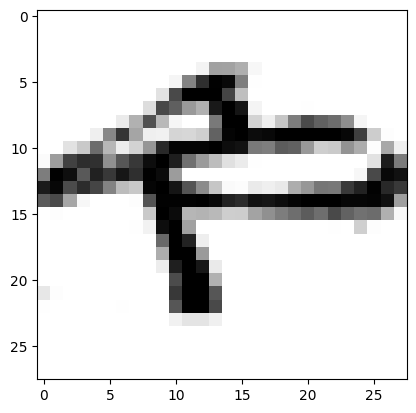

LABEL: 7
INPUT:


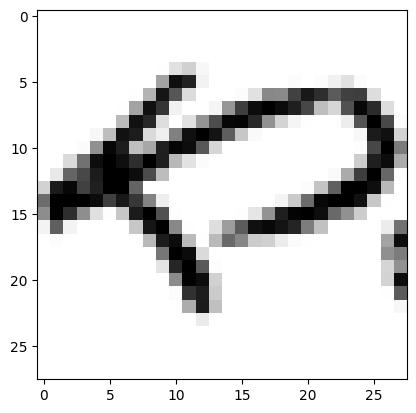

LABEL: 7
INPUT:


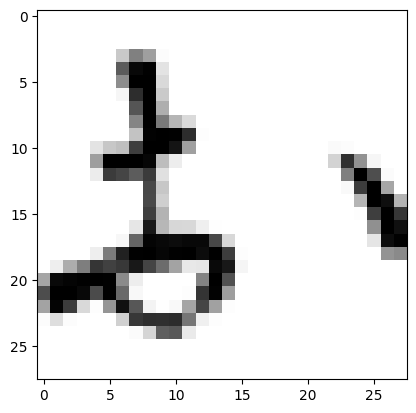

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10), (30,), (10,10), (20,30), (35,), (45,)]} #(10,10), (20,30), (35,), (45,) are added

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
#ADD YOUR CODE
mlp_grid_search = GridSearchCV(mlp, parameters, cv = 5, verbose = True)
mlp_grid_search.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
#ADD YOUR CODE
print(mlp_grid_search.best_params_)
print("Score with best parameters:")
#ADD YOUR CODE
print(mlp_grid_search.best_score_)
print("\nAll scores on the grid:")
#ADD YOUR CODE
print(mlp_grid_search.cv_results_['mean_test_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (45,)}
Score with best parameters:
0.7249999999999999

All scores on the grid:
[0.655      0.71166667 0.72333333 0.69       0.65833333 0.71
 0.62833333 0.7        0.72166667 0.725     ]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# best hidden layer size found in the previous cell
best_hidden_layer_sizes = (45,)

In [10]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 64, 128, 256, 480]} #64, 128, 256 are added

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE
mlp_2 = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, hidden_layer_sizes = best_hidden_layer_sizes)
# recall to use cv=kf to use the k-fold subdivision seen in the lectures
#ADD YOUR CODE
mlp_grid_search_2 = GridSearchCV(mlp_2, parameters, cv = kf, verbose = True)
mlp_grid_search_2.fit(X_train, y_train)
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(mlp_grid_search_2.best_params_)
print("Score with best parameters:")
#ADD YOUR CODE
print(mlp_grid_search_2.best_score_)
print("\nAll scores on the grid:")
#ADD YOUR CODE
print(mlp_grid_search_2.cv_results_['mean_test_score'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

RESULTS FOR NN

Best parameters set found:
{'batch_size': 32}
Score with best parameters:
0.7383333333333333

All scores on the grid:
[0.10166667 0.73833333 0.72666667 0.725      0.72       0.72      ]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

The best architecture is with the batch size is 32 and the hidden layer size is (45,). In general, when the number hidden layer is increased, the score decreased. Instead, when the number of hidden units are increased, the score increased. This architecture is preferred over containing more hidden layers but fewer hidden units (neurons). <br>
The algorithm didn't converge until the batch size is 480. The mini batch size discovered by cross validation is 32, which strikes a reasonable balance between the algorithm's stability and how computationally demanding it is. With this configuration, convergence cannot be achieved.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.36 sec

Training MLP of size (10, 10) ...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.35 sec

Training MLP of size (20,) ...
Done, training time: 0.39 sec

Training MLP of size (20, 20) ...
Done, training time: 0.30 sec

Training MLP of size (20, 30) ...
Done, training time: 0.34 sec

Training MLP of size (30,) ...
Done, training time: 0.42 sec

Training MLP of size (35,) ...
Done, training time: 0.46 sec

Training MLP of size (40,) ...
Done, training time: 0.49 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.45 sec

Training MLP of size (45,) ...
Done, training time: 0.52 sec



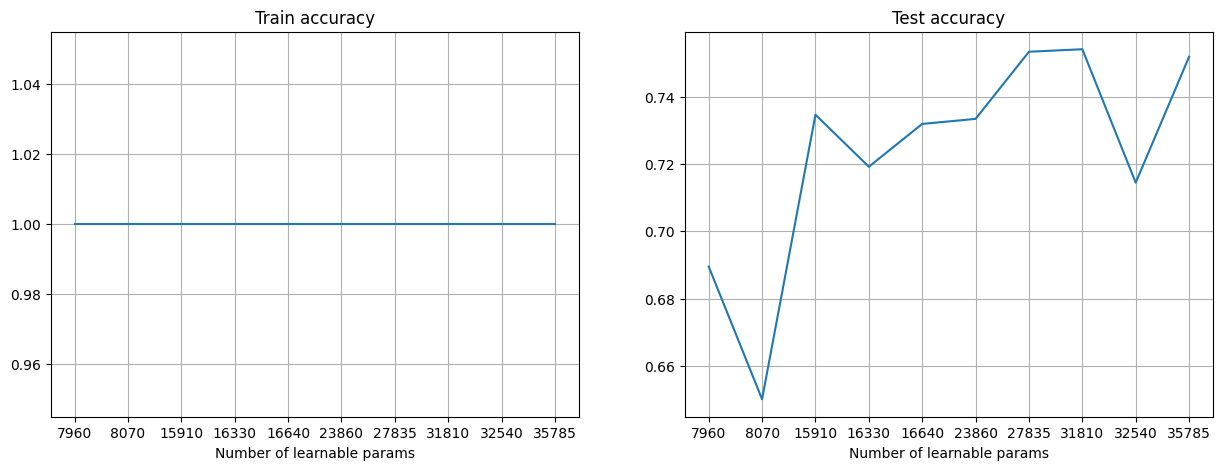

In [11]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

#hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_sizes = [(10,), (10,10), (20,), (20,20,), (20,30), (30,), (35,), (40,), (40,20,10), (45,)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1, hidden_layer_sizes=hl_size) 
    #ADD YOUR CODE
    mlp.fit(X_train, y_train)
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

The best test accuracy is obtained with hidden layer sizes is (45,) and number of learnable parameters are 35785.  The train accuracy remained at arounf 1 for general. On the other hand, the test accuracy varied through number of learnable parameters. In general, increasing the number of learnable parameters improved the performance of the algorithm. For the hidden layer sizes (40, 20, 10), the algorithm overfitted. 

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


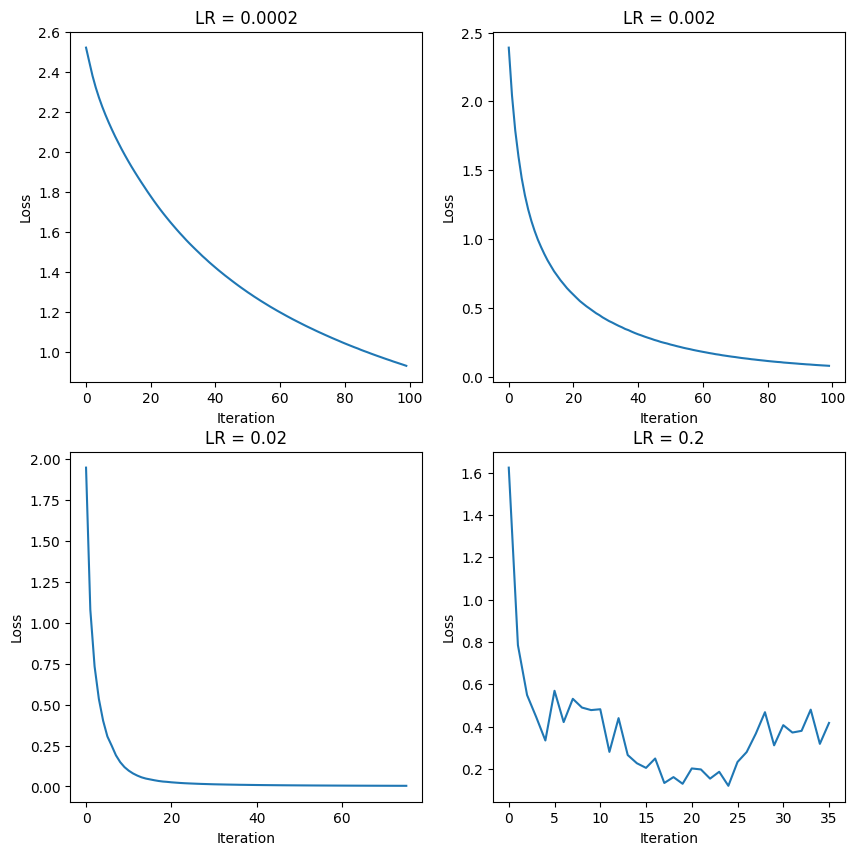

RESULTS FOR NN

Best parameters set found:
Best LR = 0.02
Score with best parameters:
Score with best lr = 0.75725


In [12]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]

#ADD YOUR CODE
losses = []
best_score = 0
best_lr = lr_list[0] # init assignment, will be changed
for lr in lr_list:
    mlp_lr = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=lr, hidden_layer_sizes=best_hidden_layer_sizes, batch_size=32)
    mlp_lr.fit(X_train, y_train)
    score = mlp_lr.score(X_test, y_test)
    if best_score < score:
        best_score = score
        best_lr = lr
    losses.append(mlp_lr.loss_curve_)

plt.figure(figsize=(10,10))
for i in range(len(lr_list)):
    plt.subplot(2,2,(i+1))
    plt.title("LR = "+str(lr_list[i]))
    display(plt.plot(losses[i]))
    plt.xlabel('Iteration')
    plt.ylabel("Loss")
plt.show()
    
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print("Best LR = "+str(best_lr))
print("Score with best parameters:")
#ADD YOUR CODE
print("Score with best lr = "+str(best_score))

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

The most unstable learning rate is 0.2. The other learning rates are stable but the lowest learning is not converging. 0.002 and 0.02 are acceptable but 0.02 is converging faster than 0.002. Hence, the best LR is chosen as 0.02.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.242750


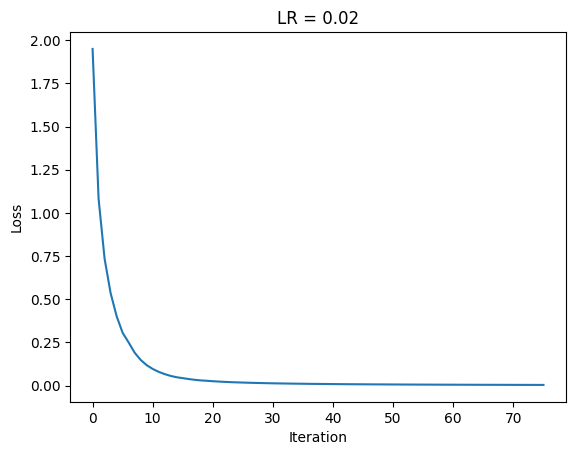

In [13]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
mlp_best_lr = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=0.02, hidden_layer_sizes=best_hidden_layer_sizes, batch_size=32)
mlp_best_lr.fit(X_train, y_train)
training_error = 1.0 - mlp_best_lr.score(X_train, y_train)
test_error = 1.0 - mlp_best_lr.score(X_test, y_test)
loss = mlp_best_lr.loss_curve_
print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
plt.title("LR = "+str(0.02))
display(plt.plot(loss))
plt.xlabel('Iteration')
plt.ylabel("Loss")
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [419 434 374 384 424 372 386 427 405 375]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [15]:
# use best architecture and params from before

#ADD YOUR CODE
mlp_large_data = MLPClassifier(max_iter=50, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=0.02, hidden_layer_sizes=best_hidden_layer_sizes, batch_size=32, verbose=True)
mlp_large_data.fit(X_train, y_train)
print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

#ADD YOUR CODE
training_error = 1.0 - mlp_large_data.score(X_train, y_train)
test_error = 1.0 - mlp_large_data.score(X_test, y_test)
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 1.03967425
Iteration 2, loss = 0.52297807
Iteration 3, loss = 0.38496874
Iteration 4, loss = 0.29813595
Iteration 5, loss = 0.23168823
Iteration 6, loss = 0.17897965
Iteration 7, loss = 0.13482027
Iteration 8, loss = 0.10819385
Iteration 9, loss = 0.08523427
Iteration 10, loss = 0.06602840
Iteration 11, loss = 0.05353742
Iteration 12, loss = 0.04381564
Iteration 13, loss = 0.03331320
Iteration 14, loss = 0.02864785
Iteration 15, loss = 0.02357637
Iteration 16, loss = 0.02030133
Iteration 17, loss = 0.01786326
Iteration 18, loss = 0.01558305
Iteration 19, loss = 0.01376051
Iteration 20, loss = 0.01240554
Iteration 21, loss = 0.01139131
Iteration 22, loss = 0.01044597
Iteration 23, loss = 0.00955826
Iteration 24, loss = 0.00892593
Iteration 25, loss = 0.00829081
Iteration 26, loss = 0.00786467
Iteration 27, loss = 0.00734072
Iteration 28, loss = 0.00694597
Iteration 29, loss = 0.00662298
Iteration 30, loss = 0.00626643
Iteration 31, loss = 0.00599249
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


NN training error: 0.000000
NN test error: 0.145196


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

Result of the test error I got with a large number of samples is better than the previous one. For 600 samples, the test error is around 0.25, for 4000 samples, the test error is around 0.15. It is seen that having more data improved the performance of the model, but the computational power is increased.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

Result of large_NN_prediction = 9
Result of NN_prediction = 2
INPUT:


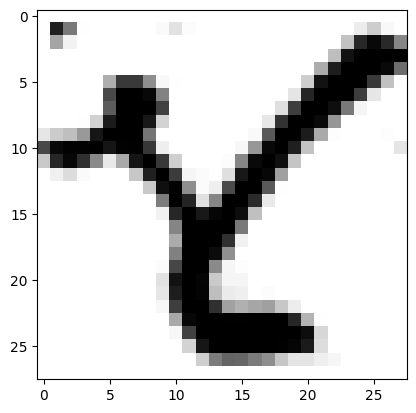

LABEL: 9


In [16]:
NN_prediction = mlp_best_lr.predict(X_test)
large_NN_prediction =mlp_large_data.predict(X_test)

#ADD YOUR CODE
for i in range(len(NN_prediction)):
    if (NN_prediction[i] !=  y_test[i]) and (large_NN_prediction[i] == y_test[i]):
        print("Result of large_NN_prediction = " + str(large_NN_prediction[i]))
        print("Result of NN_prediction = " + str(NN_prediction[i]))
        plot_input(X_test, y_test, i)
        break

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


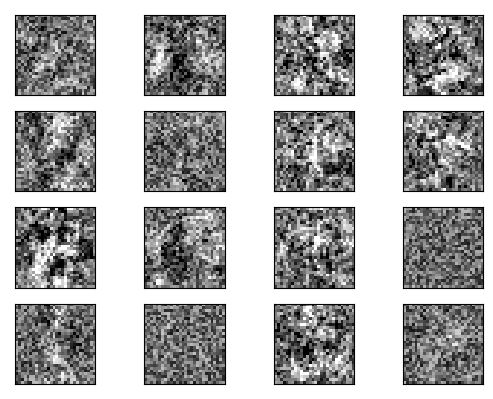

Weights with 4000 data points:


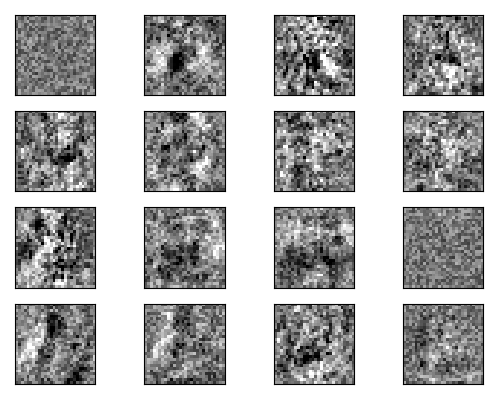

In [17]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best_lr.coefs_[0].min(), mlp_best_lr.coefs_[0].max()
for coef, ax in zip(mlp_best_lr.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large_data.coefs_[0].min(), mlp_large_data.coefs_[0].max()
for coef, ax in zip(mlp_large_data.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

The weights for the neural network containing 4000 samples look smoother than the weights for the neural network containing 600 samples, as they should. It is hard to say what exactly they represent.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [18]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

#ADD YOUR CODE
best_SVM = SVC(kernel = 'rbf', C = 10, gamma = 0.01) # taken from LAB2
best_SVM.fit(X_train, y_train)
print ('RESULTS FOR SVM')

SVM_training_score = best_SVM.score(X_train,y_train)
SVM_training_error =  1 - SVM_training_score
#print("Training score SVM:")
print("Training error SVM:")
print(SVM_training_error)
#print(SVM_training_score)

SVM_test_score = best_SVM.score(X_test,y_test)
SVM_test_error = 1 - SVM_test_score
print("Test error SVM:")
#print("Test score SVM:")
print(SVM_test_error)
#print(SVM_test_score)

RESULTS FOR SVM
Training error SVM:
0.0
Test error SVM:
0.08840000000000003


In [19]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1) 

# you can re-use your code from Lab 2

#ADD YOUR CODE
regL2.fit(X_train, y_train)
print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

y_training_pred = regL2.predict(X_train)
num_errors = 0
for i in range(m_training):
    if y_train[i] != y_training_pred[i]:
        num_errors += 1
training_error = num_errors / m_training

y_test_pred = regL2.predict(X_test)
num_errors = 0
for i in range(m_training):
    if y_test[i] != y_test_pred[i]:
        num_errors += 1
test_error = num_errors / m_training

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.027400
Test error (reg): 0.242200


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

SVM achieves the best results with test error around 0.089. NN is better than Logistic Regression with test error around 0.15. Logistic Regression is the worst one with test score around 0.24.

## QUESTION 7

What are the different ways in which you can improve the results obtained for NN? List and justify some of them.

- New activation functions can be tried. 
- More data can be added (with the same distribution): allows to reduce overfitting.
- Learnable parameters can be changed (exp. different learning rates can be tried): trying different learning rates allows us to identify whether the algorithm diverges or too many epochs to converge.
- New loss functions can be used.